<a href="https://colab.research.google.com/github/alhabibp/H8_PTP_Final_Image/blob/master/CatDog-Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classifications**

### Final Project for Intermediate Python for Data Science

1. Import package dan load data yang dibutuhkan

In [1]:
## Import required package
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0'

In [0]:
## Load data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
## Mengetahui jumlah data (training dan validation)
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [5]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
## Memberikan label pada data
class_names = ['cat','dog']

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

2. Data Preprocessing

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


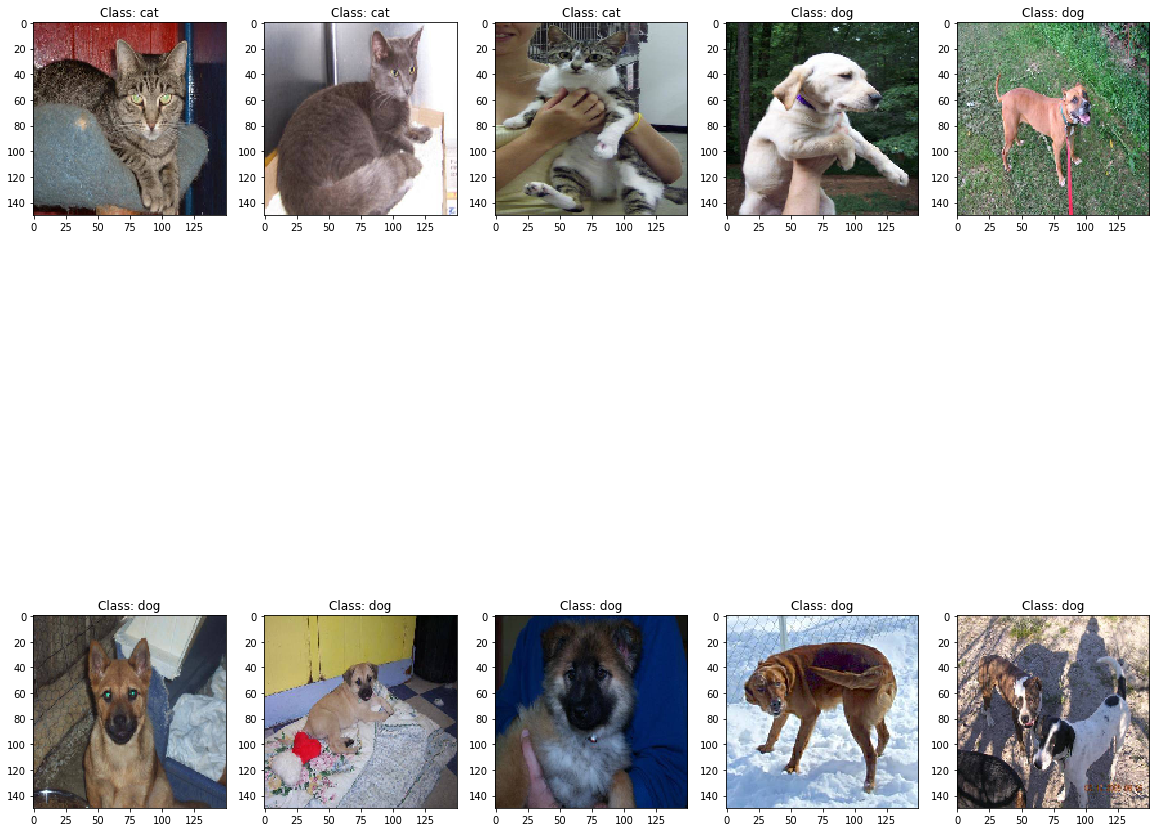

In [10]:
# Membuat definisi fungsi untuk membuat plot dengan bentuk 2 baris dan 5 kolom gambar beserta label datanya
def plotImages(images_arr, label_arr, is_predicted=0):
    fig, axes = plt.subplots(2, 5, figsize=(20,20))
    axes = axes.flatten()
    if is_predicted==0:
      for img, lbl, ax in zip( images_arr, label_arr, axes):
          ax.imshow(img)
          ax.axis()
          no_lbl = int(lbl)
          #ax.subplots_adjust(wspace=.5, hspace=.5)
          ax.set_title("Class: {}".format(class_names[no_lbl]))
    else:
      result_2 = model.predict(x = images_arr)
      label_result = model.predict_classes(x = images_arr)

      for index, (hsl, img, lbl, ax) in enumerate(zip( label_result, images_arr, label_arr, axes)):
        lbl_pred = int(hsl)
        ax.imshow(img)
        ax.axis()
        #ax.subplots_adjust(wspace=.5, hspace=.5)
        ax.set_title("Class: {}  --> Predict: {}".format(class_names[int(lbl)], class_names[lbl_pred]))

    #plt.tight_layout()
    #plt.subplots_adjust(wspace=.5, hspace=.5)
    plt.show()

# Mengambil secara acak sample data training
sample_training_images, sample_training_label = next(train_data_gen)

# Memplot data dengan definisi fungsi yang telah dibuat
plotImages(sample_training_images[:10], sample_training_label[:10])

3. Create and train classifications model

In [11]:
# Membuat classifications model 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding="same",activation="relu",input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,(3,3),padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11214976  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [0]:
#Compile the Model
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 11s 763ms/step - loss: 2.5779 - accuracy: 0.5101 - val_loss: 0.6928 - val_accuracy: 0.5033
Epoch 2/15
15/15 [==============================] - 8s 528ms/step - loss: 0.6908 - accuracy: 0.5219 - val_loss: 0.7019 - val_accuracy: 0.5134
Epoch 3/15
15/15 [==============================] - 8s 535ms/step - loss: 0.6765 - accuracy: 0.5908 - val_loss: 0.6740 - val_accuracy: 0.5714
Epoch 4/15
15/15 [==============================] - 8s 537ms/step - loss: 0.6419 - accuracy: 0.6357 - val_loss: 0.6660 - val_accuracy: 0.5982
Epoch 5/15
15/15 [==============================] - 8s 527ms/step - loss: 0.5957 - accuracy: 0.6944 - val_loss: 0.6470 - val_accuracy: 0.6373
Epoch 6/15
15/15 [==============================] - 8s 529ms/step - loss: 0.5321 - accuracy: 0.7361 - val_loss: 0.6306 - v

In [14]:
model.evaluate(val_data_gen)

  ...
    to  
  ['...']
8/8 [==============================] - 3s 368ms/step - loss: 1.0185 - accuracy: 0.6840


[1.0184597969055176, 0.684]

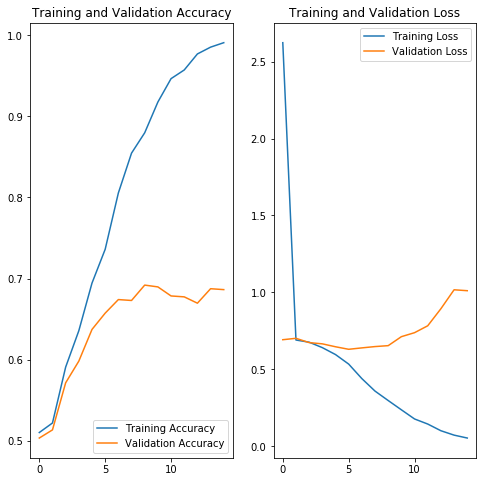

In [16]:
# Visualisasi hasil model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

4. Testing Classifications Model

1


<function matplotlib.pyplot.show>

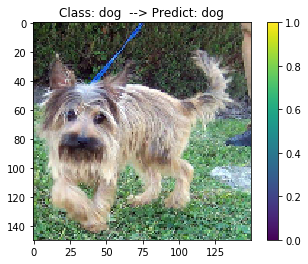

In [18]:
# Testing Model

for image_test, label_test in val_data_gen:
  break

result = model.predict(x = image_test)
label_pred = model.predict_classes(x = image_test)

import random
rnd = random.randrange(128)
test = image_test[rnd]
label_1 = label_test[rnd]
label_pred = label_pred[rnd]

print(label_pred)

plt.figure()
plt.imshow(test)
plt.title("Class: {}  --> Predict: {}".format(class_names[int(label_1)], class_names[int(label_pred)]))
plt.colorbar()
plt.grid(False)
plt.show

Overfitting

Dilihat dari hasil visualisasi model, terdapat overfitting pada model dikarenakan nilai training accuracy yang semakin tinggi, namun nilai validation accuracy hanya berkisar pada 0,70.
Untuk mengatasi overfitting terdapat beberapa cara, cara yang digunakan untuk model ini adalah *data augmentation* dan *dropout*

In [0]:
# Data augmentation, mengatasi overfitting dengan generate data train yang ada melalui transformasi (rotation, flipping, zooming, etc)
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

image_gen_val = ImageDataGenerator(rescale=1./255)

In [20]:
# Data Preprocessing

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
## Membuat model baru dengan dropout 
model_new = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding="same",activation="relu",input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64,(3,3),padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [0]:
model_new.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

In [23]:
# Train the model
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=20,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/20
15/15 [==============================] - 16s 1s/step - loss: 2.3286 - accuracy: 0.5069 - val_loss: 0.6938 - val_accuracy: 0.4922
Epoch 2/20
15/15 [==============================] - 16s 1s/step - loss: 0.6927 - accuracy: 0.5011 - val_loss: 0.6890 - val_accuracy: 0.4922
Epoch 3/20
15/15 [==============================] - 17s 1s/step - loss: 0.6891 - accuracy: 0.4963 - val_loss: 0.6835 - val_accuracy: 0.4922
Epoch 4/20
15/15 [==============================] - 16s 1s/step - loss: 0.6819 - accuracy: 0.5027 - val_loss: 0.6699 - val_accuracy: 0.4922
Epoch 5/20
15/15 [==============================] - 16s 1s/step - loss: 0.6721 - accuracy: 0.4989 - val_loss: 0.6599 - val_accuracy: 0.4922
Epoch 6/20
15/15 [==============================] - 16s 1s/step - loss: 0.6692 - accuracy: 0.5588 - val_loss: 0.6531 - val_accuracy: 0.5703
Epoch 7/20
15/15 [==============================] - 16s 1s/step - los

In [24]:
model_new.evaluate(val_data_gen)

  ...
    to  
  ['...']
8/8 [==============================] - 3s 330ms/step - loss: 0.5681 - accuracy: 0.6860


[0.5680923163890839, 0.686]

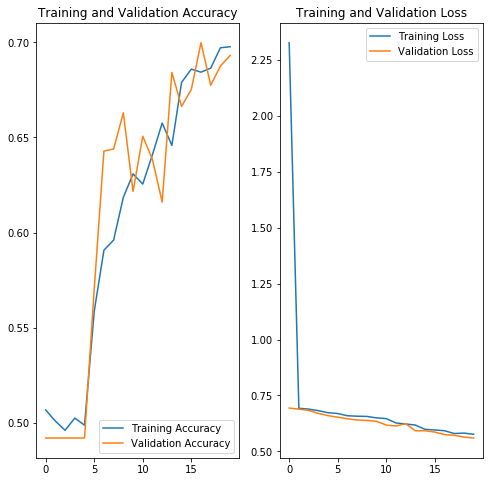

In [25]:
# Visualisasi hasil model baru

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

0


<function matplotlib.pyplot.show>

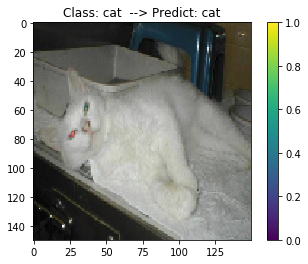

In [26]:
## Testing Model baru

for image_test, label_test in val_data_gen:
  break

result_new = model_new.predict(x = image_test)
label_pred_new = model_new.predict_classes(x = image_test)

import random
rnd = random.randrange(128)
test_new = image_test[rnd]
label_2 = label_test[rnd]
label_pred_new = label_pred_new[rnd]

print(label_pred_new)

plt.figure()
plt.imshow(test_new)
plt.title("Class: {}  --> Predict: {}".format(class_names[int(label_2)], class_names[int(label_pred_new)]))
plt.colorbar()
plt.grid(False)
plt.show

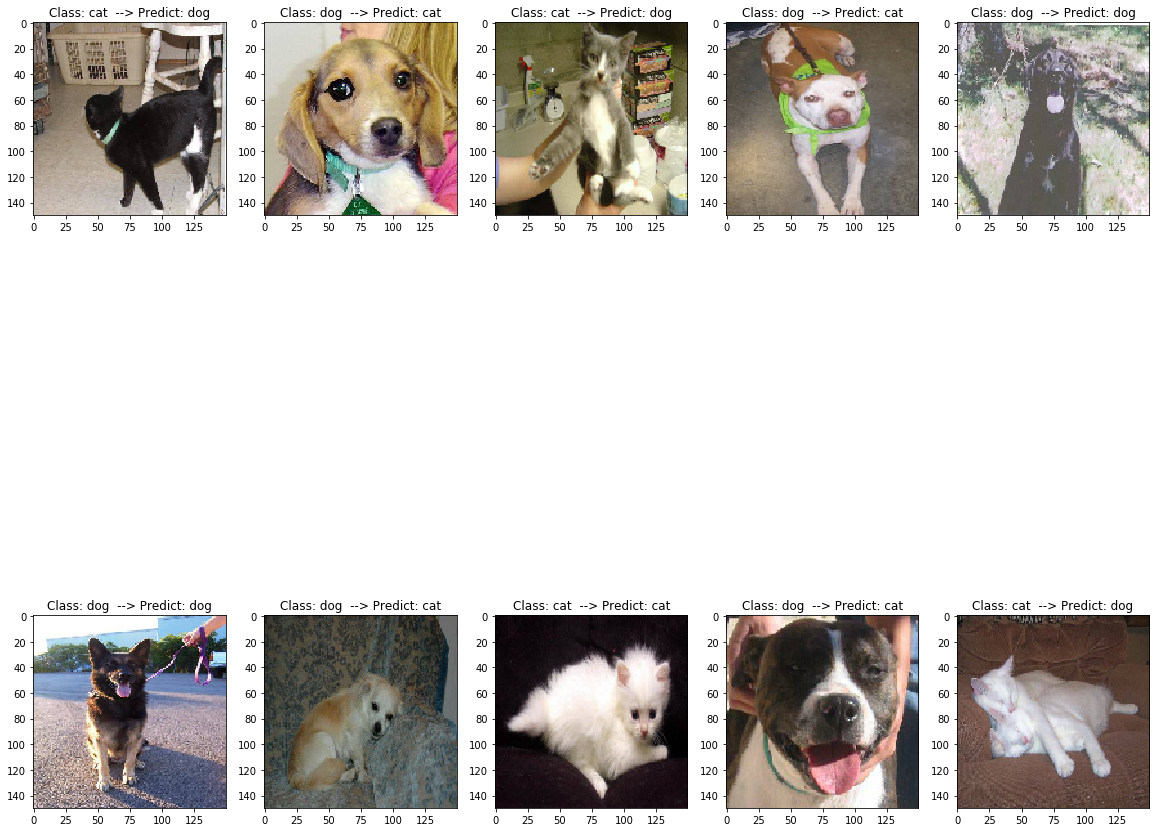

In [27]:
# Memplot data dengan definisi fungsi yang telah dibuat
plotImages(image_test[:10], label_test[:10], 1)